# Import Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import linregress

In [2]:
# See all columns in head
pd.set_option("display.max.columns", None)

# Import Data

In [3]:
skidata = pd.read_csv('ski_data.csv')

In [4]:
skidata.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [5]:
skidata.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [6]:
skidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

# Clean Data 

In [7]:
[item for item in skidata['Name']]

['Alyeska Resort',
 'Eaglecrest Ski Area',
 'Hilltop Ski Area',
 'Arizona Snowbowl',
 'Sunrise Park Resort',
 'Yosemite Ski & Snowboard Area',
 'Bear Mountain',
 'Bear Valley',
 'Boreal Mountain Resort',
 'Dodge Ridge',
 'Donner Ski Ranch',
 'Heavenly Mountain Resort',
 'June Mountain',
 'Kirkwood',
 'Mammoth Mountain Ski Area',
 'Mt. Shasta Ski Park',
 'Mountain High',
 'Mt. Baldy',
 'Northstar California',
 'Sierra-at-Tahoe',
 'Ski China Peak',
 'Snow Summit',
 'Snow Valley',
 'Soda Springs',
 'Sugar Bowl Resort',
 'Tahoe Donner',
 'Arapahoe Basin Ski Area',
 'Aspen / Snowmass',
 'Beaver Creek',
 'Breckenridge',
 'Copper Mountain Resort',
 'Crested Butte Mountain Resort',
 'Purgatory',
 'Eldora Mountain Resort',
 'Howelsen Hill',
 'Keystone',
 'Loveland',
 'Monarch Mountain',
 'Powderhorn',
 'Silverton Mountain',
 'Cooper',
 'Ski Granby Ranch',
 'Steamboat',
 'Sunlight Mountain Resort',
 'Telluride',
 'Vail',
 'Winter Park Resort',
 'Wolf Creek Ski Area',
 'Mohawk Mountain',
 'Mount 

In [8]:
skidata['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
Maine                   9
New Mexico              9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Ohio                    5
Connecticut             5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Iowa                    3
Alaska                  3
Indiana                 2
Arizona                 2
South Dakota            2
New Jersey              2
Nevada                  2
Missouri                2
Northern California     1
Rhode Island            1
Maryland                1
Tennessee               1
Name: Region

In [9]:
skidata['state'].value_counts()

New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
New Hampshire     16
Wisconsin         16
Vermont           15
Minnesota         14
Utah              13
Idaho             12
Montana           12
Massachusetts     11
Washington        10
Oregon            10
Maine              9
New Mexico         9
Wyoming            8
North Carolina     6
Connecticut        5
Ohio               5
West Virginia      4
Virginia           4
Nevada             4
Illinois           4
Iowa               3
Alaska             3
Arizona            2
New Jersey         2
South Dakota       2
Indiana            2
Missouri           2
Tennessee          1
Rhode Island       1
Maryland           1
Name: state, dtype: int64

In [10]:
skidata['summit_elev'].describe()

count      330.000000
mean      4591.818182
std       3735.535934
min        315.000000
25%       1403.750000
50%       3127.500000
75%       7806.000000
max      13487.000000
Name: summit_elev, dtype: float64

In [11]:
skidata['vertical_drop'].describe()

count     330.000000
mean     1215.427273
std       947.864557
min        60.000000
25%       461.250000
50%       964.500000
75%      1800.000000
max      4425.000000
Name: vertical_drop, dtype: float64

In [12]:
skidata['base_elev'].describe()

count      330.000000
mean      3374.000000
std       3117.121621
min         70.000000
25%        869.000000
50%       1561.500000
75%       6325.250000
max      10800.000000
Name: base_elev, dtype: float64

In [13]:
skidata['trams'].value_counts()

0    293
1     24
2      7
3      5
4      1
Name: trams, dtype: int64

In [14]:
skidata['fastEight'].value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [15]:
skidata['fastSixes'].value_counts()

0    294
1     21
2     11
6      1
5      1
4      1
3      1
Name: fastSixes, dtype: int64

In [16]:
skidata['fastQuads'].value_counts()

0     222
1      35
2      29
3      15
4       8
6       5
5       5
7       3
15      2
9       2
13      1
11      1
10      1
8       1
Name: fastQuads, dtype: int64

In [17]:
skidata['quad'].value_counts()

0    171
1     78
2     43
3     22
4      8
5      6
8      2
Name: quad, dtype: int64

In [18]:
skidata['triple'].value_counts() 

0    106
1     99
2     53
3     37
4     14
5      9
6      7
7      4
8      1
Name: triple, dtype: int64

In [19]:
skidata['double'].value_counts() 

1     89
0     82
2     70
3     34
4     25
5     21
6      6
14     1
10     1
9      1
Name: double, dtype: int64

In [20]:
skidata['surface'].value_counts() 

2     98
1     73
3     59
0     26
4     24
5     22
6     10
7      7
9      5
8      4
15     1
12     1
Name: surface, dtype: int64

In [21]:
skidata['total_chairs'].describe() 

count    330.000000
mean       8.266667
std        5.798683
min        0.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       41.000000
Name: total_chairs, dtype: float64

In [22]:
skidata['Runs'].describe()

count    326.000000
mean      48.214724
std       46.364077
min        3.000000
25%       19.000000
50%       33.000000
75%       60.000000
max      341.000000
Name: Runs, dtype: float64

In [23]:
skidata['TerrainParks'].value_counts() 

1.0     81
2.0     76
3.0     46
4.0     31
5.0     17
6.0     12
7.0      6
8.0      4
9.0      3
10.0     2
14.0     1
Name: TerrainParks, dtype: int64

In [24]:
skidata['LongestRun_mi'].describe()

count    325.000000
mean       1.433231
std        1.156171
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        6.000000
Name: LongestRun_mi, dtype: float64

In [25]:
skidata['SkiableTerrain_ac'].describe()

count      327.000000
mean       739.801223
std       1816.167441
min          8.000000
25%         85.000000
50%        200.000000
75%        690.000000
max      26819.000000
Name: SkiableTerrain_ac, dtype: float64

In [26]:
skidata['Snow Making_ac'].describe()

count     284.000000
mean      174.873239
std       261.336125
min         2.000000
25%        50.000000
50%       100.000000
75%       200.500000
max      3379.000000
Name: Snow Making_ac, dtype: float64

In [27]:
skidata['daysOpenLastYear'].describe()

count    279.000000
mean     115.103943
std       35.063251
min        3.000000
25%       97.000000
50%      114.000000
75%      135.000000
max      305.000000
Name: daysOpenLastYear, dtype: float64

In [28]:
[item for item in enumerate(skidata['yearsOpen'])]

[(0, 60.0),
 (1, 44.0),
 (2, 36.0),
 (3, 81.0),
 (4, 49.0),
 (5, 84.0),
 (6, 76.0),
 (7, 52.0),
 (8, 54.0),
 (9, 69.0),
 (10, 82.0),
 (11, 64.0),
 (12, 58.0),
 (13, 47.0),
 (14, 66.0),
 (15, 34.0),
 (16, 95.0),
 (17, 67.0),
 (18, 47.0),
 (19, 73.0),
 (20, 62.0),
 (21, 67.0),
 (22, 82.0),
 (23, 83.0),
 (24, 80.0),
 (25, 48.0),
 (26, 73.0),
 (27, 72.0),
 (28, 39.0),
 (29, 58.0),
 (30, 47.0),
 (31, 58.0),
 (32, 54.0),
 (33, 57.0),
 (34, 104.0),
 (35, 49.0),
 (36, 82.0),
 (37, 80.0),
 (38, 53.0),
 (39, 17.0),
 (40, 74.0),
 (41, 36.0),
 (42, 56.0),
 (43, 53.0),
 (44, 47.0),
 (45, 57.0),
 (46, 79.0),
 (47, 80.0),
 (48, 72.0),
 (49, 55.0),
 (50, 60.0),
 (51, 50.0),
 (52, 57.0),
 (53, 77.0),
 (54, 58.0),
 (55, 62.0),
 (56, 84.0),
 (57, 81.0),
 (58, 70.0),
 (59, 56.0),
 (60, 56.0),
 (61, 29.0),
 (62, 71.0),
 (63, 83.0),
 (64, 15.0),
 (65, 60.0),
 (66, 58.0),
 (67, 38.0),
 (68, 53.0),
 (69, 41.0),
 (70, 39.0),
 (71, 58.0),
 (72, 22.0),
 (73, 46.0),
 (74, 6.0),
 (75, 83.0),
 (76, 58.0),
 (77, 59.

In [29]:
print(skidata['Name'].iloc[115])

Pine Knob Ski Resort


In [30]:
# confirmed Pine Knob opened in 2019
skidata['yearsOpen'] = skidata['yearsOpen'].replace({2019.0:1})

In [31]:
skidata['averageSnowfall'].describe()

count    316.000000
mean     185.316456
std      136.356842
min       18.000000
25%       69.000000
50%      150.000000
75%      300.000000
max      669.000000
Name: averageSnowfall, dtype: float64

In [32]:
skidata['AdultWeekday'].describe()

count    276.000000
mean      57.916957
std       26.140126
min       15.000000
25%       40.000000
50%       50.000000
75%       71.000000
max      179.000000
Name: AdultWeekday, dtype: float64

In [33]:
skidata['AdultWeekend'].describe()

count    279.000000
mean      64.166810
std       24.554584
min       17.000000
25%       47.000000
50%       60.000000
75%       77.500000
max      179.000000
Name: AdultWeekend, dtype: float64

In [34]:
skidata['projectedDaysOpen'].describe()

count    283.000000
mean     120.053004
std       31.045963
min       30.000000
25%      100.000000
50%      120.000000
75%      139.500000
max      305.000000
Name: projectedDaysOpen, dtype: float64

In [35]:
skidata['NightSkiing_ac'].describe()

count    187.000000
mean     100.395722
std      105.169620
min        2.000000
25%       40.000000
50%       72.000000
75%      114.000000
max      650.000000
Name: NightSkiing_ac, dtype: float64

# Exploratory Data Analysis

In [36]:
profit_margin = 0.092
bus_costs = 1540000
skiers = 350000

In [37]:
# profit margin = company profit / business costs
comp_profit = (bus_costs / profit_margin)
print(comp_profit)

16739130.43478261


In [38]:
skidata.set_index('Name', inplace=True)

In [39]:
skidata.head()

,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Name,,,,,,,,,,,,,,,,,,,,,,,,,,
Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [40]:
skidataBMR = skidata[skidata.index == 'Big Mountain Resort']

In [41]:
skidataBMR

,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Name,,,,,,,,,,,,,,,,,,,,,,,,,,
Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


In [42]:
BMRticket = skidataBMR['AdultWeekday']

In [43]:
BMRticket_rev = BMRticket * skiers

In [44]:
BMRticket_rev

Name
Big Mountain Resort    28350000.0
Name: AdultWeekday, dtype: float64

In [45]:
statedata = skidata.groupby('state')['AdultWeekday'].mean()

In [46]:
statedata

state
Alaska            47.333333
Arizona           81.500000
California        78.214286
Colorado          90.714286
Connecticut       47.800000
Idaho             56.555556
Illinois          35.000000
Indiana           45.000000
Iowa              35.666667
Maine             51.500000
Maryland          59.000000
Massachusetts     40.900000
Michigan          45.458333
Minnesota         44.595714
Missouri          43.000000
Montana           51.909091
Nevada            78.500000
New Hampshire     65.571429
New Jersey        79.990000
New Mexico        65.666667
New York          50.032258
North Carolina    41.833333
Ohio              42.200000
Oregon            58.857143
Pennsylvania      52.705882
Rhode Island            NaN
South Dakota      51.500000
Tennessee         36.000000
Utah              89.083333
Vermont           83.500000
Virginia          51.000000
Washington        65.107143
West Virginia     62.500000
Wisconsin         46.428571
Wyoming           57.600000
Name: AdultWee

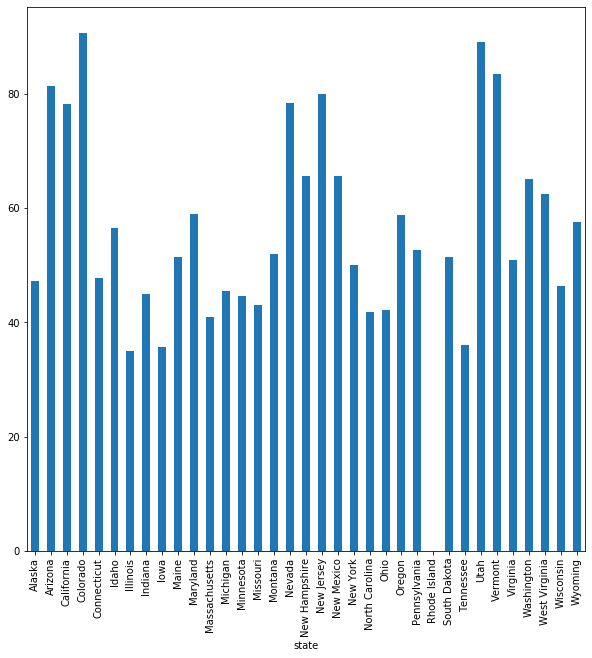

In [47]:
statedata.plot(x='state', y='AdultWeekday', kind='bar', figsize=(10,10))
plt.show()

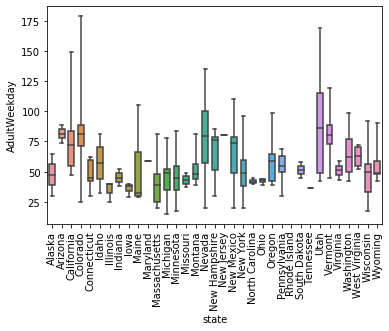

In [48]:
sns.boxplot(x='state', y='AdultWeekday', data=skidata, whis=10, width=0.6)
plt.xticks(rotation = 90)
plt.show()

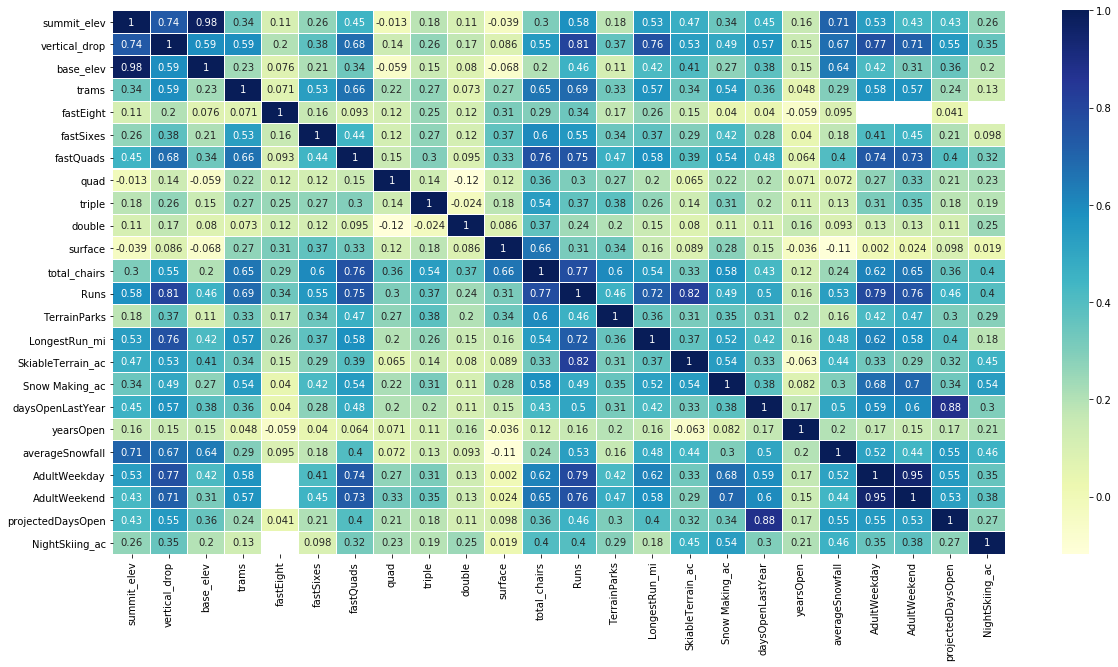

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(skidata.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

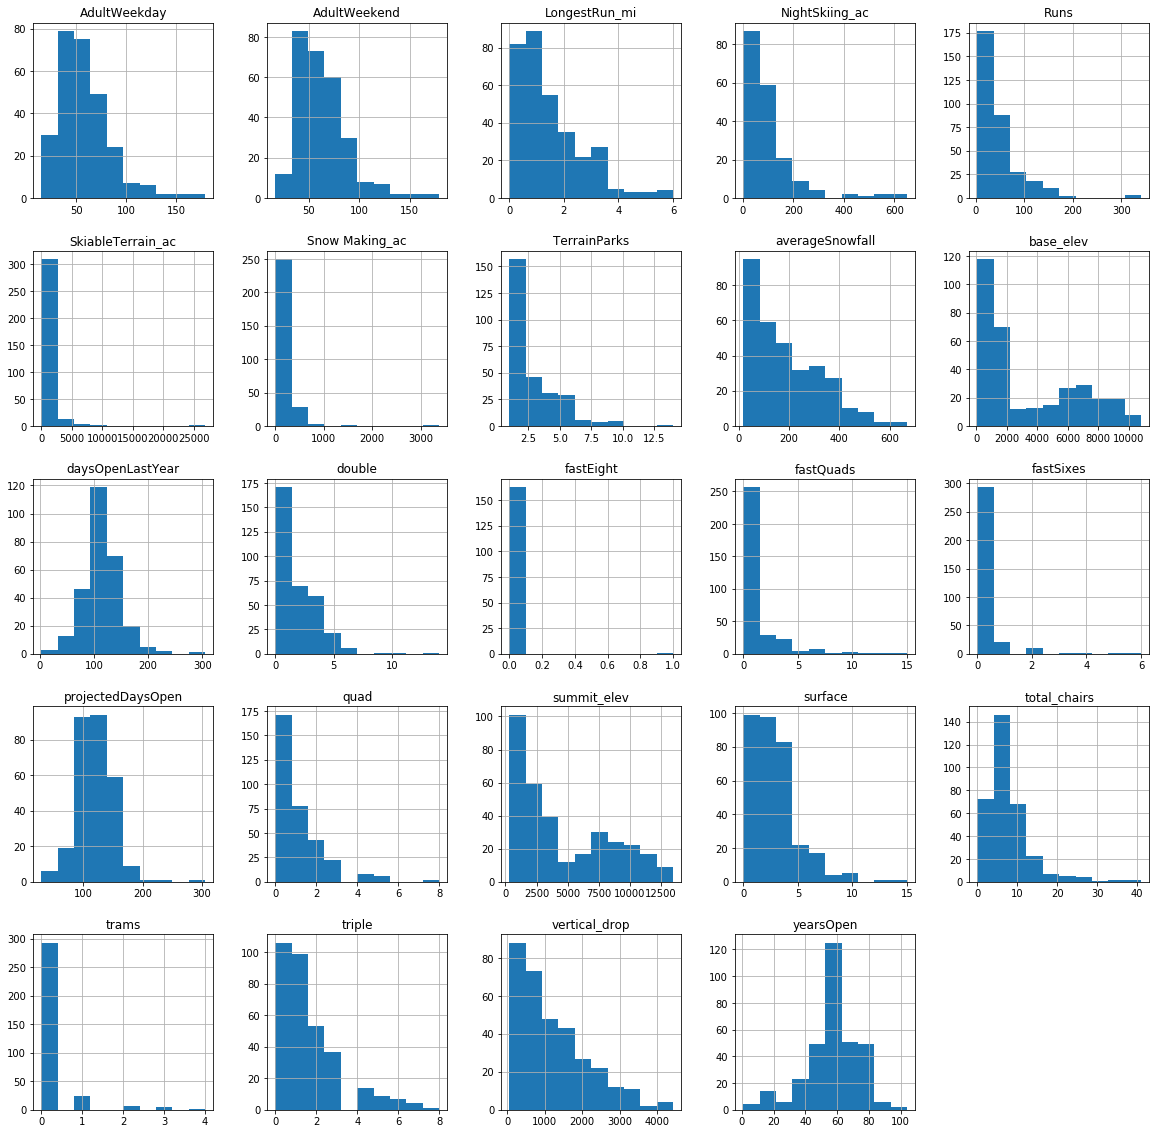

In [50]:
hist = skidata.hist(bins=10,figsize =(20,20))

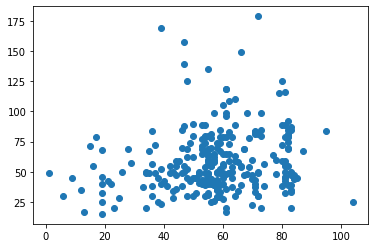

In [51]:
plt.plot(skidata['yearsOpen'], skidata['AdultWeekday'], 'o')
plt.show()

In [52]:
subset = skidata.dropna(subset=['yearsOpen', 'AdultWeekday'])

In [53]:
xs = subset['yearsOpen']
ys = subset['AdultWeekday']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.24874218432272874, intercept=43.69810416005248, rvalue=0.16574471453356124, pvalue=0.005866937697078255, stderr=0.0895735204158226)


In [54]:
# with every year in business, ticket prices go up about $0.25
slope1 = 0.24874218432272874

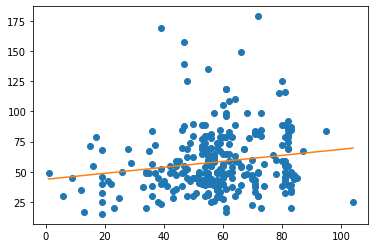

In [55]:
plt.plot(skidata['yearsOpen'], skidata['AdultWeekday'], 'o')

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.show()

In [56]:
newBMRdf = skidata[skidata.index == 'Big Mountain Resort']

In [57]:
skidataBMR['ticket_price_inc1'] = slope1

/Users/memanuel0109/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
skidataBMR

,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,ticket_price_inc1
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0.248742


In [59]:
skidata2 = skidata.reset_index()

In [60]:
indexNames = skidata2[skidata2['state'] != 'Montana'].index

In [61]:
skidata2 = skidata2.drop(indexNames)

In [62]:
skidata2

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
140,Big Sky Resort,Montana,Montana,11166,4350,7500,1,1.0,2,5,3,7,5,12,36,317.0,8.0,6.0,5800.0,400.0,144.0,46.0,400.0,NaN,NaN,144.0,NaN
141,Blacktail Mountain Ski Area,Montana,Montana,6676,1440,5236,0,NaN,0,0,0,1,2,1,4,27.0,NaN,0.7,1000.0,NaN,NaN,21.0,250.0,42.0,42.0,NaN,NaN
142,Bridger Bowl,Montana,Montana,8700,2600,6100,0,0.0,0,0,1,6,1,3,11,105.0,2.0,1.5,2000.0,100.0,122.0,64.0,350.0,63.0,63.0,133.0,NaN
143,Discovery Ski Area,Montana,Montana,8150,2380,5770,0,0.0,0,0,0,5,2,1,8,74.0,1.0,1.5,2400.0,25.0,116.0,46.0,225.0,49.0,49.0,116.0,NaN
144,Great Divide,Montana,Montana,7330,1580,5750,0,0.0,0,0,0,0,5,1,6,110.0,6.0,3.0,1600.0,150.0,94.0,78.0,180.0,48.0,48.0,100.0,100.0
145,Lost Trail - Powder Mtn,Montana,Montana,8200,1800,6400,0,NaN,0,0,0,0,5,3,8,69.0,2.0,2.5,1800.0,NaN,84.0,81.0,325.0,46.0,46.0,80.0,NaN
146,Maverick Mountain,Montana,Montana,8520,2020,6500,0,NaN,0,0,0,0,1,1,2,22.0,NaN,1.3,255.0,NaN,NaN,83.0,160.0,39.0,39.0,NaN,NaN
147,Montana Snowbowl,Montana,Montana,7600,2600,5000,0,NaN,0,0,0,0,2,2,4,37.0,NaN,1.2,950.0,20.0,NaN,58.0,300.0,50.0,50.0,NaN,10.0
148,Red Lodge Mountain,Montana,Montana,9416,2400,7016,0,0.0,0,2,0,1,3,1,7,70.0,2.0,2.5,1635.0,496.0,142.0,59.0,250.0,67.0,67.0,136.0,NaN
149,Showdown Montana,Montana,Montana,8200,1400,6800,0,0.0,0,0,0,1,2,1,4,36.0,1.0,1.8,640.0,NaN,86.0,83.0,250.0,47.0,47.0,85.0,NaN


In [63]:
subset = skidata2.dropna(subset=['total_chairs', 'AdultWeekday'])

In [64]:
xs = subset['total_chairs']
ys = subset['AdultWeekday']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=3.0849315068493155, intercept=31.9972602739726, rvalue=0.8582327044834772, pvalue=0.0007226692445214006, stderr=0.6149747549700165)


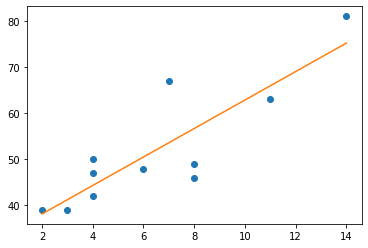

In [65]:
plt.plot(skidata2['total_chairs'], skidata2['AdultWeekday'], 'o')

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.show()

In [66]:
subset = skidata.dropna(subset=['total_chairs', 'AdultWeekday'])

In [67]:
xs = subset['total_chairs']
ys = subset['AdultWeekday']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=3.5722200192075357, intercept=30.737021592986142, rvalue=0.6174336542470339, pvalue=2.1360626647021006e-30, stderr=0.27494083026249816)


In [68]:
# with each additional chair, ticket prices go up about $3.57 on average
slope2 = 3.5722200192075357

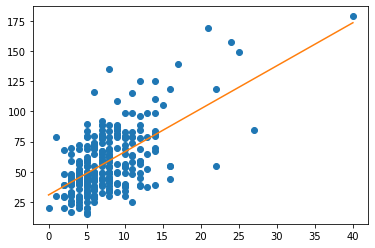

In [69]:
plt.plot(skidata['total_chairs'], skidata['AdultWeekday'], 'o')

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.show()

# Modeling

In [70]:
#skidata['newAdultWeekday'] = skidata['AdultWeekday'] + slope1 + slope2

In [71]:
#new_BMRticket_rev = newBMRdf['newAdultWeekday'] * skiers

In [72]:
#new_BMRticket_rev

In [73]:
#inc_profit = new_BMRticket_rev - BMRticket_rev

In [74]:
#inc_profit